Ch3 p41

The data in Example 3.6 are from the kind of periodic data referred to in p40. Use the relation developed in p40 to ge tthe periodic cubic spline curve. Which of the results of Example 3.6 are the closest to this spline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from naf.incf import (csisv, c_h, cubic_spline_coeff_matrix, cubic_spline_vector, solve_s_vector, 
                        cubic_spline_poly_coeffs, cubic_spline_interpolation)

In [2]:
pts = np.array([[0.0, 0.302],
                [0.2, 0.185],
                [0.3, 0.106],
                [0.4, 0.093],
                [0.5, 0.240],
                [0.6, 0.579],
                [0.7, 0.561],
                [0.8, 0.468],
                [1.0, 0.302]])

t1 = np.linspace(0,0.2,num=5)
t2 = np.linspace(0.25,0.8,num=12)
t3 = np.linspace(0.85,1.0,num=4)
t = np.concatenate((t1, t2, t3))
print(t)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [6]:
#base option from example
iy2a = csisv(t, pts, 2, -0.585, -0.830)
#average of two slopes applied to both ends
iy2b = csisv(t, pts, 2, -0.7075, -0.7075)
#force to one slope
iy2c = csisv(t, pts, 2, -0.585, -0.585)
#switching the end slopes between the two ends
iy2d = csisv(t, pts, 2, -0.830, -0.585)
intp = np.column_stack((t,iy2a, iy2b, iy2c, iy2d))
print(tabulate(intp, floatfmt=".3f"))

def compare_slopes(y):
    s1 = abs(y[1] - y[0])
    s2 = abs(y[-1] - y[-2])
    diff = s1 - s2
    print(s1)
    print(s2)
    print(diff)
    print("\n")
    
compare_slopes(iy2a)
compare_slopes(iy2b)
compare_slopes(iy2c)
compare_slopes(iy2d)

-----  -----  -----  -----  -----
0.000  0.302  0.302  0.302  0.302
0.050  0.275  0.271  0.275  0.267
0.100  0.249  0.245  0.249  0.241
0.150  0.220  0.218  0.220  0.216
0.200  0.185  0.185  0.185  0.185
0.250  0.143  0.143  0.143  0.144
0.300  0.106  0.106  0.106  0.106
0.350  0.087  0.087  0.087  0.087
0.400  0.093  0.093  0.093  0.093
0.450  0.133  0.133  0.133  0.133
0.500  0.240  0.240  0.240  0.240
0.550  0.424  0.424  0.424  0.424
0.600  0.579  0.579  0.579  0.579
0.650  0.608  0.608  0.608  0.608
0.700  0.561  0.561  0.561  0.561
0.750  0.511  0.512  0.512  0.512
0.800  0.468  0.468  0.468  0.468
0.850  0.426  0.424  0.423  0.423
0.900  0.385  0.381  0.378  0.378
0.950  0.343  0.340  0.336  0.336
1.000  0.302  0.302  0.302  0.302
-----  -----  -----  -----  -----
0.027340709270869124
0.04141083122208866
-0.014070121951219539


0.030996101801356923
0.03775543869160086
-0.006759336890243939


0.027340512012624496
0.03409984890286849
-0.006759336890243994


0.03465149433184472
0.0

I am assuming that equal slopes will be reflected by equal values of slope between the first and second values, and last and second-to-last values in the table above. The other way to consider this is that the difference in end slopes will be 0, or nearly so. 

As can be seen from the results above, the best solution is calculating the approximate end slopes and then switching them. I.e. A is equal to the approximate slope at the end of the data and B is equal to the approximate slope from the beginning of the data. This is best solution by an order of magnitude. 

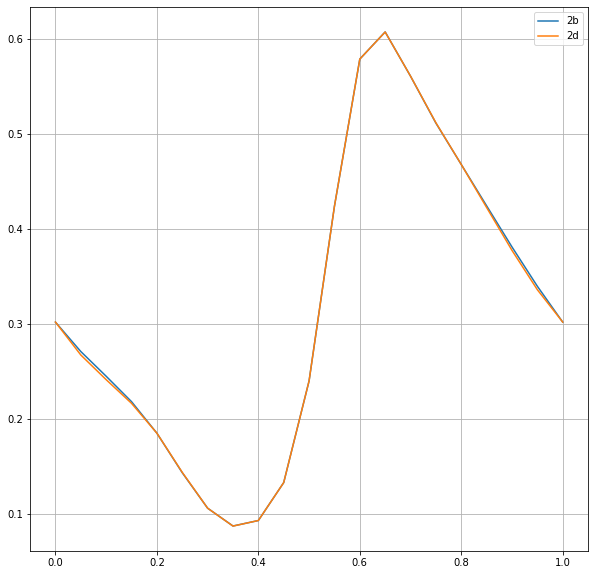

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
i = 0
j = 21
ax.grid()
#ax.plot(t[i:j], iy2a[i:j], label="2a")
ax.plot(t[i:j], iy2b[i:j], label="2b")
#ax.plot(t[i:j], iy2c[i:j], label="2c")
ax.plot(t[i:j], iy2d[i:j], label="2d")
ax.legend()
plt.show()